In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
data=pd.read_csv("SalaryData_Train.csv")
data1=pd.read_csv("SalaryData_Test.csv")


In [22]:
data1.shape

(15060, 14)

In [23]:
data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
data1.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [25]:
data.shape

(30161, 14)

In [26]:
data1.shape

(15060, 14)

In [27]:
data=data.append(data1)

In [28]:
data.shape

(45221, 14)

In [29]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='Salary', ylabel='count'>

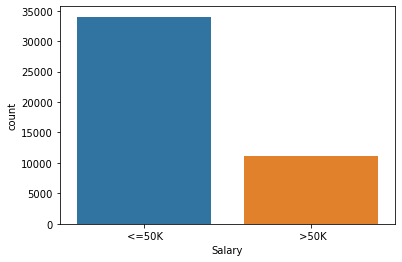

In [30]:
sn.countplot('Salary',data=data)

<AxesSubplot:>

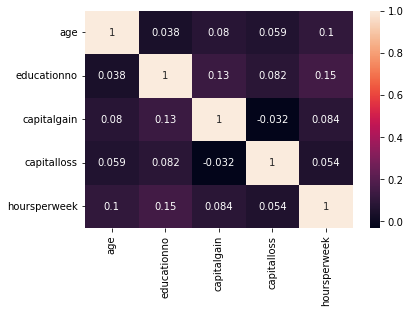

In [31]:
sn.heatmap(data.corr(),annot=True)

In [32]:
data.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
8192,44,Federal-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,15024,0,40,Philippines,>50K
10449,26,Private,Bachelors,13,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
28860,22,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,30,United-States,<=50K
16347,63,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,48,United-States,<=50K
30019,35,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [33]:
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['education']=encoder.fit_transform(data['education'])
data['native']=encoder.fit_transform(data['native'])
data['maritalstatus']=encoder.fit_transform(data['maritalstatus'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['education'])
data['race']=encoder.fit_transform(data['race'])
data['sex']=encoder.fit_transform(data['education'])
data['Salary']=encoder.fit_transform(data['Salary'])

In [34]:
data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,9,4,9,2174,0,40,37,0
1,50,4,9,13,2,3,9,4,9,0,0,13,37,0
2,38,2,11,9,0,5,11,4,11,0,0,40,37,0
3,53,2,1,7,2,5,1,2,1,0,0,40,37,0
4,28,2,9,13,2,9,9,2,9,0,0,40,4,0


In [35]:
x=data.iloc[:,:-1]
y=data['Salary']
model=DecisionTreeClassifier()
model.fit(x,y)
model.feature_importances_


array([0.1754056 , 0.05160208, 0.00738932, 0.1235633 , 0.18034787,
       0.06950914, 0.0084654 , 0.01947547, 0.00799404, 0.18493676,
       0.04650276, 0.10371207, 0.02109619])

In [36]:
data=data.drop(columns=['workclass','education','relationship','race','sex','capitalloss','native'])

In [37]:
data

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek,Salary
0,39,13,4,0,2174,40,0
1,50,13,2,3,0,13,0
2,38,9,0,5,0,40,0
3,53,7,2,5,0,40,0
4,28,13,2,9,0,40,0
...,...,...,...,...,...,...,...
15055,33,13,4,9,0,40,0
15056,39,13,0,9,0,36,0
15057,38,13,2,9,0,50,0
15058,44,13,0,0,5455,40,0


In [38]:
x=data.iloc[:,:-1]
y=data['Salary']
x

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek
0,39,13,4,0,2174,40
1,50,13,2,3,0,13
2,38,9,0,5,0,40
3,53,7,2,5,0,40
4,28,13,2,9,0,40
...,...,...,...,...,...,...
15055,33,13,4,9,0,40
15056,39,13,0,9,0,36
15057,38,13,2,9,0,50
15058,44,13,0,0,5455,40


In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 45221, dtype: int32

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [41]:
x_train

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek
10607,73,3,2,10,0,20
2752,39,13,4,3,0,45
11901,44,9,4,2,0,40
17994,25,10,4,0,0,40
217,28,15,4,9,0,55
...,...,...,...,...,...,...
23030,26,13,0,3,0,38
24932,38,10,2,11,0,50
1519,20,10,4,11,1055,30
29484,33,15,2,3,0,65


In [42]:
y_train.shape

(31654,)

In [43]:
#Building A basic Model
basic_model=SVC(kernel='sigmoid',gamma=0.0001)
basic_model.fit(x_train,y_train)
y_pred=basic_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     10527
           1       0.41      0.45      0.43      3040

    accuracy                           0.73     13567
   macro avg       0.62      0.63      0.62     13567
weighted avg       0.74      0.73      0.73     13567



<AxesSubplot:xlabel='Salary', ylabel='count'>

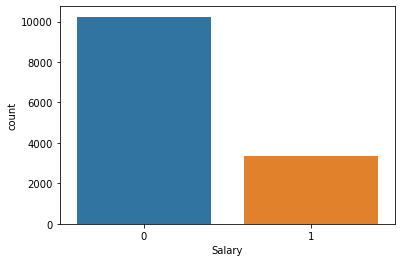

In [47]:
sn.countplot(y_test) 

<AxesSubplot:ylabel='count'>

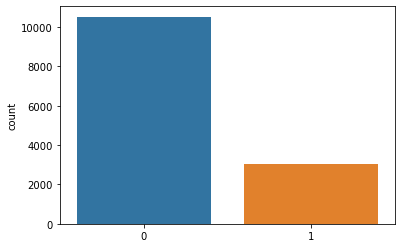

In [46]:
sn.countplot(y_pred)

In [ ]:
#Building Best model with Grid search CV
model=SVC()
Params={
    'kernel':['linear', 'rbf'],
    'gamma':[2,1,0.5,0.2,0.002],
    'C':[1,10,50]
}

gscv=GridSearchCV(model,Params,cv=10)
gscv.fit(x_train.sample(240),y_train.sample(240))

In [ ]:
print(gscv.get_params,"\n", " Best Parameters for the model",gscv.best_params_)
#Since the data is too large and the params grid contains multiple values, it is taking more than 12 hours(I actually 
# ran and waited), hence assuming the best parameter to construct final model

In [54]:
#Final Model
final_model=SVC(kernel='rbf',gamma=1,C=10)
basic_model.fit(x_train,y_train)
y_pred=basic_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     10527
           1       0.41      0.45      0.43      3040

    accuracy                           0.73     13567
   macro avg       0.62      0.63      0.62     13567
weighted avg       0.74      0.73      0.73     13567



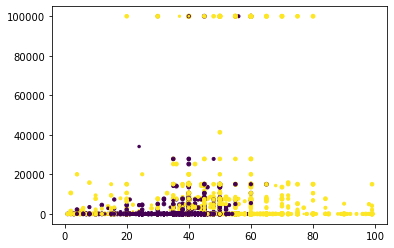

In [55]:
plt.scatter(x_test['hoursperweek'],x_test['capitalgain'],x_test['educationno'],c=y_pred)